Kaggle: https://www.kaggle.com/c/digit-recognizer

Tutorial: https://www.kaggle.com/jiuzhang/ninechapter-knn/

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
TRAIN_DIR = '/Users/songyihe/Documents/Study/AI_Projects/large-datasets/digit-recognizer/train.csv'
TEST_DIR = '/Users/songyihe/Documents/Study/AI_Projects/large-datasets/digit-recognizer/test.csv'

# Explantory Data Analyisis

In [3]:
import matplotlib.pyplot as plt

In [4]:
def show_example(X, y, row):
    print(y[row])
    plt.imshow(X[row].reshape((28, 28)))
    plt.show()

In [5]:
def show_examples(X, y, show_how_many=4):
    classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    for col, cls in enumerate(classes):
        idxs = np.nonzero([i == cls for i in y]) # Note: nonzero means i==cls is true.
        idxs = np.random.choice(idxs[0], show_how_many)
        for i , idx in enumerate(idxs):
            plt_idx = i * len(classes) + col + 1
            plt.subplot(show_how_many, len(classes), plt_idx)
            plt.imshow(X[idx].reshape((28, 28)))
            plt.axis("off")
            if i == 0:
                plt.title(cls)      
    plt.show()

1.Take a Glance at the Data

In [6]:
train = pd.read_csv(TRAIN_DIR, sep=',', header=0)
test = pd.read_csv(TEST_DIR, sep=',', header=0)

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [9]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. Show Some Examples

9


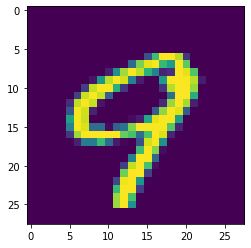

In [11]:
show_example(train.values[:300, 1:], train.values[:300, 0], 100)

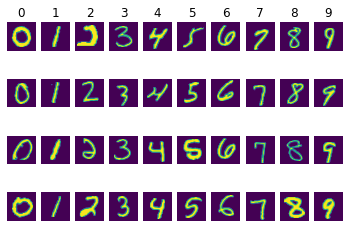

In [12]:
show_examples(train.values[:300, 1:], train.values[:300, 0])

# Prepare Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train = pd.read_csv(TRAIN_DIR, sep=',', header=0)
test = pd.read_csv(TEST_DIR, sep=',', header=0)

1. Training Set, Cross Validation Set, Test Set

In [15]:
X, y = train.values[:300, 1:], train.values[:300, 0]

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)
print(f'Training Set - X train shape: {X_train.shape}, y train shape: {y_train.shape}')
print(f'Validation Set - X val shape: {X_val.shape}, y train shape: {y_val.shape}')

Training Set - X train shape: (240, 784), y train shape: (240,)
Validation Set - X val shape: (60, 784), y train shape: (60,)


# KNN Model

In [17]:
class KNN():
    def __init__(self, K=3):
        self.K = K
        
    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train
                
    def predict(self, X_test_multiple):
        num_samples = X_test_multiple.shape[0]
        y_pred = np.zeros(num_samples)
        for i in range(num_samples):
            X_test = X_test_multiple[i]
            dist = self.__calc_dist(X_test)
            y_pred[i] = self.__find_the_closet(dist)
        return y_pred
    
    def __calc_dist(self, X_test):
        """
        Description: Calculate the discription for one test sample.
        """
        X_train, y_train = self.X_train, self.y_train
        diff = X_test - X_train
        squared_diff = diff ** 2
        sum_squared_diff = np.sum(squared_diff, axis=1)
        dist = sum_squared_diff ** 0.5
        return dist
    
    def __find_the_closet(self, dist):
        y_train, K = self.y_train, self.K
        sort = dist.argsort()
        
        class_count = {}
        for i in range(K):
            vote = y_train[sort[i]]
            class_count[vote] = class_count.get(vote, 0) + 1
            
        max_class, max_count = -1, -1
        for cls, count in class_count.items():
            if count > max_count:
                max_class, max_count = cls, count
        return max_class

# Hyperparameter Tuning

In [18]:
X_test = test.values[:30, :]
print(f'Test Set - X test shape: {X_test.shape}')

Test Set - X test shape: (30, 784)


In [19]:
from sklearn.metrics import accuracy_score, classification_report

In [20]:
KRANGE = range(1, 8)

In [21]:
def find_optimal_K(X_train, y_train, X_val, y_val):   
    scores = []
    for K in KRANGE:
        knn = KNN(K)
        knn.fit(X_train, y_train)
    
        y_pred = knn.predict(X_val)
        accuracy = accuracy_score(y_val,y_pred)
        scores.append(accuracy)
    
        print(f"k = {K}: accuracy = {accuracy}")
        print('classification_report')
        print(classification_report(y_val, y_pred))
        # print('confusion_matrix')
        # print(confusion_matrix(y_val, y_pred))
    
    plt.plot(KRANGE, scores)
    plt.xlabel('Value of K')
    plt.ylabel('Testing accuracy')
    plt.show()

k = 1: accuracy = 0.7666666666666667
classification_report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.80      1.00      0.89         8
           2       1.00      0.43      0.60         7
           3       0.78      0.78      0.78         9
           4       0.80      0.57      0.67         7
           5       0.50      1.00      0.67         1
           6       1.00      0.78      0.88         9
           7       0.75      0.86      0.80         7
           8       0.50      0.50      0.50         4
           9       0.25      1.00      0.40         1

    accuracy                           0.77        60
   macro avg       0.73      0.79      0.71        60
weighted avg       0.82      0.77      0.77        60

k = 2: accuracy = 0.7666666666666667
classification_report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1  

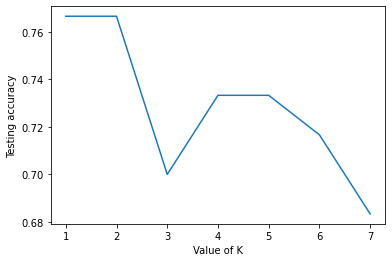

In [22]:
find_optimal_K(X_train, y_train, X_val, y_val)

# Model 1: KNN

In [23]:
K = 3

In [24]:
knn = KNN(K)
knn.fit(X, y)

7.0


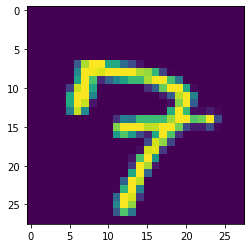

In [25]:
y_pred = knn.predict(X_test)
show_example(X_test, y_pred, 5)

In [26]:
pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),\
              "Label": y_pred}).to_csv('submission.csv', index=False,header=True)